IMPORTING THE LIBRARIES

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

READING THE DATA

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv('/content/drive/MyDrive/DATA FILES/titanic survival prediction/TItanic_data.csv')
print(df)

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

EXPLORATORY ANALYSIS

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [11]:
df.shape

(418, 12)

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
df .isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
# importing missing age and fare values by taking the mean of the values and using them only
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())
df .isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [16]:
Embarked = df['Embarked'].unique()
# to collect the unique values in the Embarked coloumn as an array called Embarked
for Embarkeds in Embarked:
  print("->", Embarkeds)
# this code iterates thru each unique value in the Embarked array using the loop variable Embarkeds and prints an arrow in front of each unique value

-> Q
-> S
-> C


In [17]:
df['Embarked'] = df['Embarked'].map({'Q': 0, 'S': 1, 'C': 2}).astype(int)
# using the map function to map the array column unique values to int values
df['Sex'] = df['Sex'].map({'female': 1, 'male': 0}).astype(int)
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object

In [18]:
# converting age and fare to int
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

In [19]:
# dropping unnecessary columns (the axis=1 represents columns are to be deleted and not rows)
try:
  data = df.drop(['PassengerId','Name','Cabin','Ticket'], axis =1)
except:
   print(" ")

df.head()
# had to put this block cuz error was coming

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",0,34,0,0,330911,7,NaN,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7,NaN,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9,NaN,0
3,895,0,3,"Wirz, Mr. Albert",0,27,0,0,315154,8,NaN,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12,NaN,1


DATA VISUALIZATION

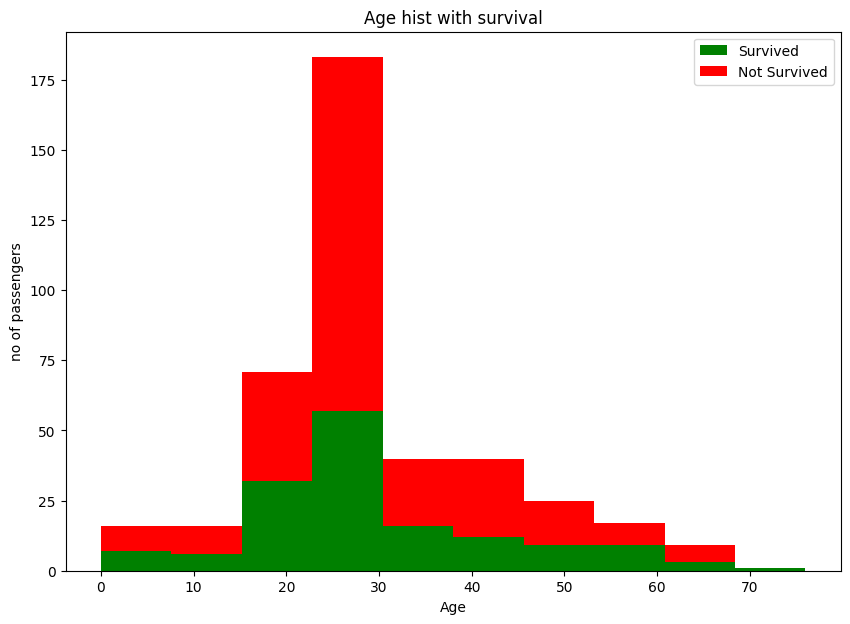

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,7))  #gives the dimensions of the new plot in the form of a figure, not imp though
plt.hist(x = [df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']], stacked=True, color=['g', 'r'], label=['Survived', 'Not Survived'])
# here, we're passing the parameters for the histogram as 2 datasets as a list of arrays: ages of passengers who survived and who didn't
# stacked = true indicates that both the datas will be stacked on top of eachother
# since it is a histogram, we will only give the x parameter and the y parameter will be the frequency that gets generated automatically
plt.title('Age hist with survival')
plt.xlabel('Age')
plt.ylabel('no of passengers')
plt.legend()

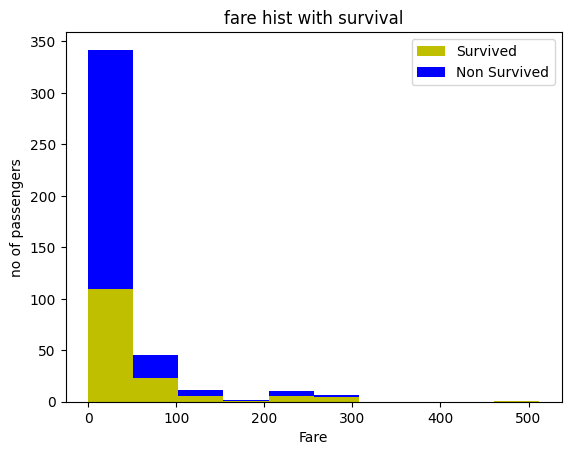

In [21]:
# fig = plt.figure(figsize=(10, 7))
plt.hist(x=[df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']], stacked=True, color=['y', 'b'], label=['Survived', 'Non Survived'])
plt.title('fare hist with survival')
plt.xlabel('Fare')
plt.ylabel('no of passengers')
plt.legend()

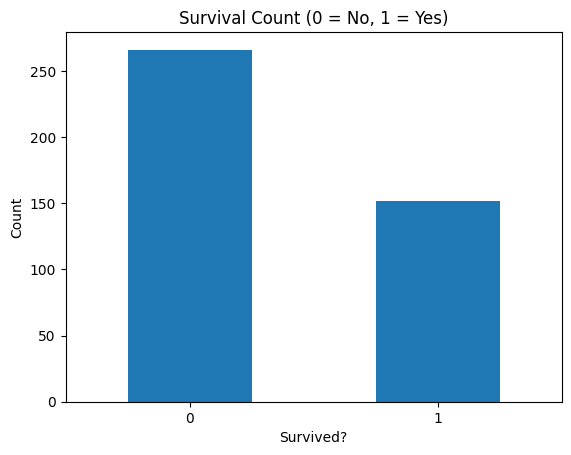

In [22]:
column = 'Survived' #assigning the variable column to the string survived, indicating we want to create a bar chart for the distribution of survival outcomes in the df
survival_counts=df[column].value_counts() #we are using the value counts func to count the occurences of each unique value in the Survived column which will create a series object called survival_counts
# in the survival_counts, the index represents 0 and 1 which will correspond to survived and not survived and the values represent the counts of each value in the df
survival_counts.plot(kind='bar', rot=0) #the rot says that the x axis labels should not be rotated
plt.xlabel('Survived?')
plt.ylabel('Count')
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

Didn't understand the use of the above graph at all

SPLITTING THE DATA INTO TRAINING AND TESTING

In [25]:
from sklearn.model_selection import train_test_split
Train = df.drop(['Survived'], axis=1)  #contains all columns except the survived one. axis = 1 represents that the column needs to be dropped and not the row
Test = df.iloc[:,1]  #iloc indexing helps choose only specific columns and rows from a df
# here, specifically, it chooses all rows and the 2nd column of the df, considering it is using 0 indexing
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.2, random_state = 1)  #random state ensures the shuffling is same for everytime we do it

MODEL BUILDING

In [26]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear', max_iter=200) #its setting the solver as liblinear and max no of iterations to 200
LR.fit(x_train, y_train)
y_pred=LR.predict(x_test)
# predits the target labels for the test data x_test and stores the data in a variable in y_pred
LRacc = accuracy_score(y_pred, y_test)
# returns the accuracy using the accuracy score function in the LRacc variable
print(f"accuracy: {LRacc*100} ")


ValueError: ignored